<a href="https://colab.research.google.com/github/Aliyahk888/GAN-based-Image-Restoration-and-Colourization/blob/main/GeneralizedModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!unzip /content/drive/MyDrive/CapstoneProject-AMMM/Datasets/colourfuldataset.zip 

In [ ]:
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
from matplotlib import image
from matplotlib import pyplot as plt
import os
from tensorflow import keras
import argparse
import cv2

# The batch size we'll use for training
batch_size = 64

# Size of the image required to train our model
img_size = 128

# These many images will be used from the data archive
dataset_split = 2500

master_dir = '/content/drive/MyDrive/CapstoneProject-AMMM/Datasets/CFM'

# y = []
# for image_file in sorted(os.listdir( master_dir )[ 0 : ]):
#   if image_file[-3:]=="jpg":
#     rgb_image = Image.open( os.path.join( master_dir , image_file ) ).resize( ( img_size , img_size ) )
#     # Normalize the RGB image array
#     rgb_img_array = (np.asarray( rgb_image ) ) / 255

#     # Normalize the grayscale image array

#     y.append( rgb_img_array )








In [ ]:
import glob
import os

x_dir = '/content/drive/MyDrive/CapstoneProject-AMMM/Datasets/GoPro/train'
kernel_size = 10

#blur

paths_gt = sorted(glob.glob(os.path.join(x_dir, '*/sharp/*.png')))

paths_blur = sorted(glob.glob(os.path.join(x_dir, '*/blur/*.png')))

print(paths_gt) 




['/content/drive/MyDrive/CapstoneProject-AMMM/Datasets/GoPro/train/GOPR0372_07_00/sharp/000047.png', '/content/drive/MyDrive/CapstoneProject-AMMM/Datasets/GoPro/train/GOPR0372_07_00/sharp/000048.png', '/content/drive/MyDrive/CapstoneProject-AMMM/Datasets/GoPro/train/GOPR0372_07_00/sharp/000049.png', '/content/drive/MyDrive/CapstoneProject-AMMM/Datasets/GoPro/train/GOPR0372_07_00/sharp/000050.png', '/content/drive/MyDrive/CapstoneProject-AMMM/Datasets/GoPro/train/GOPR0372_07_00/sharp/000051.png', '/content/drive/MyDrive/CapstoneProject-AMMM/Datasets/GoPro/train/GOPR0372_07_00/sharp/000052.png', '/content/drive/MyDrive/CapstoneProject-AMMM/Datasets/GoPro/train/GOPR0372_07_00/sharp/000053.png', '/content/drive/MyDrive/CapstoneProject-AMMM/Datasets/GoPro/train/GOPR0372_07_00/sharp/000054.png', '/content/drive/MyDrive/CapstoneProject-AMMM/Datasets/GoPro/train/GOPR0372_07_00/sharp/000055.png', '/content/drive/MyDrive/CapstoneProject-AMMM/Datasets/GoPro/train/GOPR0372_07_00/sharp/000056.png',

In [ ]:
x=[]
y=[]
for i, path in enumerate(paths_gt):
  blur_image = Image.open(paths_blur[i]).resize( ( img_size , img_size ) )
  blur_image = blur_image.convert( 'L' )
  blur_img_array = (np.asarray( blur_image ) ) / 255
  x.append( blur_img_array )

  clear_image = Image.open(path).resize( ( img_size , img_size ) )
  clear_img_array = (np.asarray( clear_image ) ) / 255
  y.append( clear_img_array )
  



In [ ]:
print(len(x), len(y))

2103 2103


In [ ]:
temp_x=x
temp_y=y

In [ ]:
print(len(temp_x), len(temp_y))

2103 2103


In [ ]:
#nothing
colorful_dir = '/content/drive/MyDrive/CapstoneProject-AMMM/Datasets/CFM'
for image_file in sorted(os.listdir( colorful_dir )[ 0:5500 ]):
  if image_file[-3:]=="jpg":


    rgb_image = Image.open( os.path.join( colorful_dir , image_file ) ).resize( ( img_size , img_size ) )
    # Normalize the RGB image array
    rgb_img_array = (np.asarray( rgb_image ) ) / 255

    # Normalize the grayscale image array

    y.append( rgb_img_array )
    #gray_image = Image.open( os.path.join( colorful_dir , image_file ) ).resize( ( img_size , img_size ) )
    gray_image = rgb_image.convert( 'L' )
    gray_img_array = np.asarray( gray_image ) / 255
    #kernel_v = np.zeros((kernel_size, kernel_size))
    #kernel_v[:, int((kernel_size - 1)/2)] = np.ones(kernel_size)
    #kernel_v /= kernel_size
    #gray_img_array = cv2.filter2D(gray_img_array, -1, kernel_v)
    x.append( gray_img_array )

In [ ]:
print(len(x), len(y))

7603 7603


In [ ]:
#noise
from skimage.util import random_noise

for image_file in sorted(os.listdir( x_dir )[ 5400 : ]):
  if image_file[-3:]=="jpg":

    rgb_image = Image.open( os.path.join( master_dir , image_file ) ).resize( ( img_size , img_size ) )
    # Normalize the RGB image array
    rgb_img_array = (np.asarray( rgb_image ) ) / 255

    # Normalize the grayscale image array

    y.append( rgb_img_array )
    gray_image = Image.open( os.path.join( x_dir , image_file ) ).resize( ( img_size , img_size ) )
    gray_image = gray_image.convert( 'L' )
    gray_img_array =  np.asarray( gray_image ) / 255
    gray_img_array = random_noise(gray_img_array, mode="poisson")
    x.append( gray_img_array )

In [ ]:
print(len(x),len(y))


2103 2103


In [ ]:
# master_dir = '/content/data/'

# for image_file in os.listdir( master_dir )[ 0 :]:
#     rgb_image = Image.open( os.path.join( master_dir , image_file ) ).resize( ( img_size , img_size ) )
#     # Normalize the RGB image array
#     rgb_img_array = (np.asarray( rgb_image ) ) / 255
#     gray_image = rgb_image.convert( 'L' )

#     # Normalize the grayscale image array
#     gray_img_array = ( np.asarray( gray_image ).reshape( ( img_size , img_size ) ) ) / 255
#     #gray_img_array = cv2.blur(gray_img_array,(6,6)) - to blur
#     #gray_blur=cv2.blur(gray_img_array,(6,6))
#     # Append both the image arrays
#     x.append( gray_img_array )
#     y.append( rgb_img_array )

In [ ]:
print(len(x)) #to check the length of the list with elements having different shape

for i,item in enumerate(y):
  if item.shape!=(128,128,3):
    x.pop(i)
    y.pop(i)

print(len(x),len(y))

7603
7601 7601


In [ ]:
print(y[0].shape)

(128, 128, 3)


In [ ]:
# Train-test splitting
train_x, test_x, train_y, test_y = train_test_split( np.array(x) , np.array(y) , test_size=0.1,shuffle=True)

# Construct tf.data.Dataset object

train_x = np.repeat(train_x[..., np.newaxis], 3, -1)
print(train_x.shape)
test_x = np.repeat(test_x[..., np.newaxis], 3, -1)

dataset = tf.data.Dataset.from_tensor_slices( (train_x , train_y ) )
dataset = dataset.batch( batch_size )

(6840, 128, 128, 3)


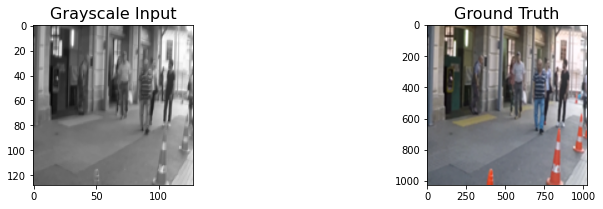

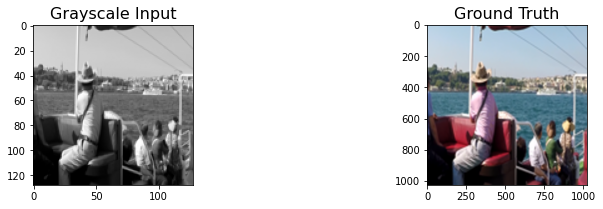

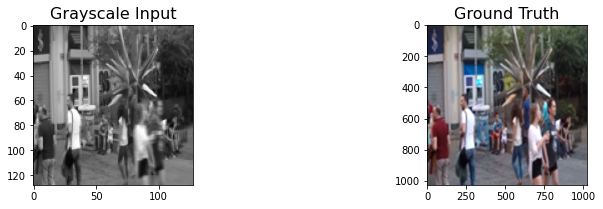

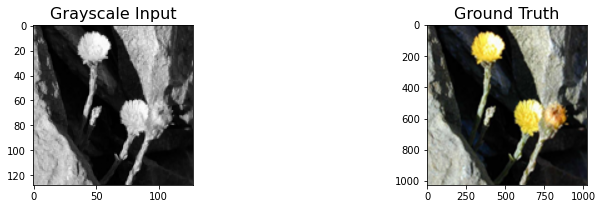

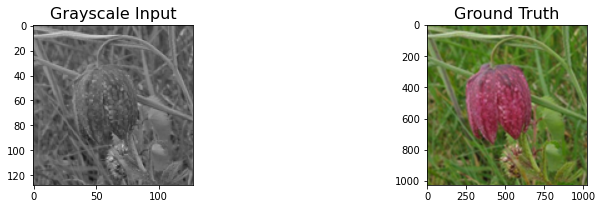

In [ ]:
i=0
while(i<5):
  plt.figure(figsize=(10,10))
  or_image = plt.subplot(3,3,1)
  or_image.set_title('Grayscale Input', fontsize=16)
  plt.imshow(train_x[i] , cmap='gray' )

  ou_image = plt.subplot(3,3,3)
  image = Image.fromarray( ( train_y[i] * 255 ).astype( 'uint8' ) ).resize( ( 1024 , 1024 ) )
  ou_image.set_title('Ground Truth', fontsize=16)
  plt.imshow( image )
  i+=1


In [ ]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50

def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    return x

def decoder_block(input, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x



In [ ]:
def get_generator_model():
    """ Input """
    inputs = tf.keras.layers.Input( shape=( img_size , img_size , 3 ) )

    """ Pre-trained ResNet50 Model """
    resnet50 = ResNet50(include_top=False, weights="imagenet", input_tensor=inputs)
    #print(resnet50.summary())

    """ Encoder """
    s1 = resnet50.get_layer("input_2").output           ## (128 x 128)
    s2 = resnet50.get_layer("conv1_relu").output        ## (64 x 64)
    s3 = resnet50.get_layer("conv2_block3_out").output  ## (32 x 32)
    s4 = resnet50.get_layer("conv3_block4_out").output
    s5 = resnet50.get_layer("conv4_block6_out").output
    b1 = resnet50.get_layer("conv5_block3_out").output ## (4 x 4)

    """ Bridge """
    #b1 = resnet50.get_layer("conv4_block6_out").output  ## (32 x 32)

    """ Decoder """
    d1 = decoder_block(b1, s5, 256)                    
    d2 = decoder_block(d1, s4, 128)                    
    d3 = decoder_block(d2, s3, 64)                    
    d4 = decoder_block(d3, s2, 32)
    d5 = decoder_block(d4, s1, 16)                      

    """ Output """
    outputs = Conv2D(3, 1, padding="same", activation="sigmoid")(d5)

    model = Model(inputs, outputs, name="ResNet50_U-Net")
    return model

In [ ]:
def get_discriminator_model():
    layers = [
        tf.keras.layers.Conv2D( 32 , kernel_size=( 7 , 7 ) , strides=1 , activation='relu' , input_shape=( 128 , 128 , 3 ) ),
        tf.keras.layers.Conv2D( 32 , kernel_size=( 7, 7 ) , strides=1, activation='relu'  ),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D( 64 , kernel_size=( 5 , 5 ) , strides=1, activation='relu'  ),
        tf.keras.layers.Conv2D( 64 , kernel_size=( 5 , 5 ) , strides=1, activation='relu'  ),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D( 128 , kernel_size=( 3 , 3 ) , strides=1, activation='relu'  ),
        tf.keras.layers.Conv2D( 128 , kernel_size=( 3 , 3 ) , strides=1, activation='relu'  ),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D( 256 , kernel_size=( 3 , 3 ) , strides=1, activation='relu'  ),
        tf.keras.layers.Conv2D( 256 , kernel_size=( 3 , 3 ) , strides=1, activation='relu'  ),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense( 512, activation='relu'  )  ,
        tf.keras.layers.Dense( 128 , activation='relu' ) ,
        tf.keras.layers.Dense( 16 , activation='relu' ) ,
        tf.keras.layers.Dense( 1 , activation='sigmoid' ) 
    ]
    model = tf.keras.models.Sequential( layers )
    return model


In [ ]:
from keras.applications.vgg16 import VGG16
import keras.backend as K
cross_entropy = tf.keras.losses.BinaryCrossentropy()
mse = tf.keras.losses.MeanSquaredError()
mae = tf.keras.losses.MeanAbsoluteError()
img_shape=(128,128,3)
K_1=145
K_2=170
vgg = VGG16(include_top=False, weights='imagenet', input_shape=img_shape)
lossModel = Model(inputs=vgg.input, outputs=vgg.get_layer('block3_conv3').output)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output) - tf.random.uniform( shape=real_output.shape , maxval=0.1 ) , real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output) + tf.random.uniform( shape=fake_output.shape , maxval=0.1  ) , fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

###ADDED

def lossL1(yTrue, yPred):
    y=tf.cast(yTrue, tf.float32)
    return K.mean(K.abs(yPred - yTrue))

def lossPerceptual(yTrue, yPred):
    lossModel.trainable = False
    return K.mean(K.square(lossModel(yTrue) - lossModel(yPred)))

import keras.backend as K

def wasserstein_loss(y_true, y_pred):
    return K.mean(float(y_true)*float(y_pred))

def generator_loss(fake_output , real_y):
    # gan_loss = cross_entropy(tf.ones_like(fake_output), fake_output)
    # real_y = tf.cast( real_y , 'float32' )
    # mae_loss=mae( fake_output , real_y )
    # total_loss = gan_loss + (100*mae_loss)
    #return total_loss
    return 150 * lossPerceptual(real_y, fake_output)+100 * lossL1(float(real_y), float(fake_output))+ 1*wasserstein_loss(real_y,fake_output)




generator_optimizer = tf.keras.optimizers.Adam( 0.0005 )
discriminator_optimizer = tf.keras.optimizers.Adam( 0.0005 )

generator = get_generator_model()
discriminator = get_discriminator_model()


In [ ]:
@tf.function
def train_step( input_x , real_y ):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        # Generate an image -> G( x )
        generated_images = generator( input_x , training=True)
        print(generated_images[0].shape)

        # Probability that the given image is real -> D( x )
        real_output = discriminator( real_y, training=True)

        # Probability that the given image is the one generated -> D( G( x ) )
        generated_output = discriminator(generated_images, training=True)

        # L2 Loss -> || y - G(x) ||^2
        gen_loss = generator_loss( generated_images , real_y )

        # Log loss for the discriminator
        disc_loss = discriminator_loss( real_output, generated_output )

    
    #tf.keras.backend.print_tensor( tf.keras.backend.mean( gen_loss ) )
    #tf.keras.backend.print_tensor( gen_loss + disc_loss )

    # Compute the gradients
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    # Optimize with Adam
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))


In [ ]:
num_epochs = 100

for e in range( num_epochs ):
    print( e )
    for ( x , y ) in dataset:
        # Here ( x , y ) represents a batch from our training dataset.
        print( x.shape )
        train_step( x , y )
        


Streaming output truncated to the last 5000 lines.
(64, 128, 128, 3)
(64, 128, 128, 3)
(64, 128, 128, 3)
(64, 128, 128, 3)
(64, 128, 128, 3)
(64, 128, 128, 3)
(64, 128, 128, 3)
(64, 128, 128, 3)
(64, 128, 128, 3)
(64, 128, 128, 3)
(64, 128, 128, 3)
(64, 128, 128, 3)
(64, 128, 128, 3)
(64, 128, 128, 3)
(64, 128, 128, 3)
(64, 128, 128, 3)
(64, 128, 128, 3)
(64, 128, 128, 3)
(64, 128, 128, 3)
(64, 128, 128, 3)
(64, 128, 128, 3)
(64, 128, 128, 3)
(64, 128, 128, 3)
(64, 128, 128, 3)
(64, 128, 128, 3)
(64, 128, 128, 3)
(64, 128, 128, 3)
(64, 128, 128, 3)
(64, 128, 128, 3)
(64, 128, 128, 3)
(64, 128, 128, 3)
(56, 128, 128, 3)
54
(64, 128, 128, 3)
(64, 128, 128, 3)
(64, 128, 128, 3)
(64, 128, 128, 3)
(64, 128, 128, 3)
(64, 128, 128, 3)
(64, 128, 128, 3)
(64, 128, 128, 3)
(64, 128, 128, 3)
(64, 128, 128, 3)
(64, 128, 128, 3)
(64, 128, 128, 3)
(64, 128, 128, 3)
(64, 128, 128, 3)
(64, 128, 128, 3)
(64, 128, 128, 3)
(64, 128, 128, 3)
(64, 128, 128, 3)
(64, 128, 128, 3)
(64, 128, 128, 3)
(64, 128, 

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue Oct 25 07:39:41 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0    44W /  70W |  14632MiB / 15109MiB |      4%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
y = generator( test_x[0 : ] ).numpy()
generator.save("/content/drive/MyDrive/CapstoneProject-AMMM/Models/ColorizationWithPerception_GoProWithColorfulData_100")

In [ ]:
for i in range(len(test_x)):
  plt.figure(figsize=(10,10))
  or_image = plt.subplot(3,3,1)
  or_image.set_title('Grayscale Input', fontsize=16)
  plt.imshow( test_x[i] , cmap='gray' )

  in_image = plt.subplot(3,3,2)    
  image = Image.fromarray( ( y[i] * 255 ).astype( 'uint8' ) ).resize( ( 1024 , 1024 ) )
  image = np.asarray( image )
  in_image.set_title('Colorized Output', fontsize=16)
  plt.imshow( image )

  ou_image = plt.subplot(3,3,3)
  image = Image.fromarray( ( test_y[i] * 255 ).astype( 'uint8' ) ).resize( ( 1024 , 1024 ) )
  ou_image.set_title('Ground Truth', fontsize=16)
  plt.imshow( image )

  plt.show()

In [ ]:

# load and evaluate a saved model
from numpy import loadtxt
from tensorflow.keras.models import load_model
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
from matplotlib import image
from matplotlib import pyplot as plt
import os
from tensorflow import keras
import argparse
import cv2


generator = load_model("/content/drive/MyDrive/CapstoneProject-AMMM/Models/ColorizationWithPerception_GoProWithColorfulData_100")

In [ ]:
def custom():
  batch_size = 64

  # Size of the image required to train our model
  img_size = 128

  # These many images will be used from the data archive
  dataset_split = 2500

  master_dir = 'data'
  c = []

  custom_image = Image.open('/content/drive/MyDrive/CapstoneProject-AMMM/SampleImages/clear/8.jpg').resize( ( img_size , img_size ) )
  # Normalize the RGB image array
  custom_image = custom_image.convert( 'L' )

  # Normalize the grayscale image array
  #custom_img_array = custom_image.convert( 'L' )
  custom_img_array = np.asarray( custom_image ) / 255
  #custom_img_array = (np.asarray( custom_image ))/255

  #kernel_v = np.zeros((kernel_size, kernel_size))
  #kernel_v[:, int((kernel_size - 1)/2)] = np.ones(kernel_size)
  #kernel_v /= kernel_size
  #custom_img_array = cv2.filter2D(custom_img_array, -1, kernel_v)

  #custom_img_array=cv2.blur(custom_img_array,(6,6))
  # Append both the image arrays
  c.append( custom_img_array )

  #y.append( rgb_img_array )
# Train-test splitting
  custom_x = np.array(c)

  custom_x = np.repeat(custom_x[..., np.newaxis], 3, -1)


  # Construct tf.data.Dataset object

  # cust_x = np.repeat(custom_x[..., np.newaxis], 3, -1)
  pred = generator(custom_x[0 : ] ).numpy()


  plt.figure(figsize=(10,10))
  or_image = plt.subplot(3,3,1)
  or_image.set_title('Blurry Input', fontsize=16)
  plt.imshow(custom_x[0], cmap='gray')

  in_image = plt.subplot(3,3,2)    
  image = Image.fromarray( ( pred[0] * 255 ).astype( 'uint8' ) ).resize( ( 1024 , 1024 ) )
  image = np.asarray( image )
  in_image.set_title('Restored Output', fontsize=16)
  plt.imshow( image )


  plt.show()



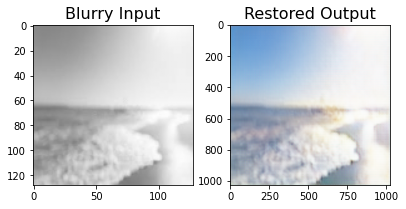

In [ ]:
custom()

In [ ]:
generator.save("/content/drive/MyDrive/CapstoneProject-AMMM/Models/ColorizationWithPerception_generalized_50")